In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm

In [94]:
base_path = '/home/rsaha/projects/dm_alchemy/src/saved_models/'
model_size = 'xsmall'
task_type = 'classification_multi_label'
shop = '1'
qhop = '2'
seed_list = [0,1,2]

file_path = f'{base_path}{model_size}/{task_type}/shop_{shop}_qhop_{qhop}/'

In [95]:
predictions_list = []
targets_list = []

epochs = 60
for seed in tqdm(seed_list):
    seed_x_predictions = []
    seed_x_targets = []
    for epoch in range(epochs):
        file_name = f'{file_path}seed_{seed}/predictions/predictions_{task_type}_epoch_{epoch+1:03d}.npz'
        predictions = np.load(file_name, allow_pickle=True)['predictions']
        seed_x_predictions.append(predictions)
    predictions_list.append(np.array(seed_x_predictions))
        
    for epoch in range(epochs):
        file_name = f'{file_path}seed_{seed}/predictions/targets_{task_type}_epoch_{epoch+1:03d}.npz'
        targets = np.load(file_name, allow_pickle=True)['targets']
        seed_x_targets.append(targets)
    targets_list.append(np.array(seed_x_targets))
   

100%|██████████| 3/3 [00:06<00:00,  2.08s/it]


In [96]:
predictions_list[1].shape

(60, 81152, 13)

In [104]:
# for seed_idx, seed_predictions in enumerate(predictions_list):
seed_idx = 2
seed_predictions = predictions_list[seed_idx]
for epoch_idx, epoch_predictions in enumerate(seed_predictions):
    if epoch_predictions.shape != predictions_list[1][0].shape:
        print("Shape:", epoch_predictions.shape)
        file_name = f'{file_path}seed_{seed_list[seed_idx]}/predictions/predictions_{task_type}_epoch_{epoch_idx+1:03d}.npz'
        print(f"Shape mismatch found in file: {file_name}")

Shape: (80896, 13)
Shape mismatch found in file: /home/rsaha/projects/dm_alchemy/src/saved_models/xsmall/classification_multi_label/shop_1_qhop_2/seed_2/predictions/predictions_classification_multi_label_epoch_001.npz
Shape: (80896, 13)
Shape mismatch found in file: /home/rsaha/projects/dm_alchemy/src/saved_models/xsmall/classification_multi_label/shop_1_qhop_2/seed_2/predictions/predictions_classification_multi_label_epoch_002.npz
Shape: (80896, 13)
Shape mismatch found in file: /home/rsaha/projects/dm_alchemy/src/saved_models/xsmall/classification_multi_label/shop_1_qhop_2/seed_2/predictions/predictions_classification_multi_label_epoch_003.npz
Shape: (80896, 13)
Shape mismatch found in file: /home/rsaha/projects/dm_alchemy/src/saved_models/xsmall/classification_multi_label/shop_1_qhop_2/seed_2/predictions/predictions_classification_multi_label_epoch_004.npz
Shape: (80896, 13)
Shape mismatch found in file: /home/rsaha/projects/dm_alchemy/src/saved_models/xsmall/classification_multi_la

In [57]:
predictions_list[0].shape

(60, 81152, 13)

In [100]:
# Create a dummy array with shape (3, *predictions_list[0].shape)
dummy_array = np.zeros((3, *predictions_list[0].shape))

for seed_idx in seed_list:
    print(f"Processing seed {seed_idx}...")
    dummy_array[seed_idx] = predictions_list[seed_idx]

Processing seed 0...
Processing seed 1...
Processing seed 2...


ValueError: could not broadcast input array from shape (60,80896,13) into shape (60,81152,13)

In [92]:
dummy_array[1] = predictions_list[1]

In [55]:
dummy_array.shape

(3, 81152, 13)

In [46]:
d = np.array(predictions_list)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (3, 60) + inhomogeneous part.

In [ ]:
# Average the predictions across seeds.
predictions_list = np.array(predictions_list)
predictions_list = np.mean(predictions_list, axis=0)
# Average the targets across seeds.
targets_list = np.array(targets_list)
targets_list = np.mean(targets_list, axis=0)

 

In [28]:
print("For epoch 0, the predictions have the following form: ", predictions_list[0])
print("For epoch 0, the targets have the following form: ", targets_list[0])
print("The shape of predictions is: ", predictions_list[0].shape)

print("Let's consider the first 3 dimensions for the predictions and targets.")
print("They refer to the following: \n color. \n the next three features refer to the size, \n \
    the next three features refer to the shape, \n and the final four features refer to the 'value' of the stone")
print("I want to plot the confusion matrix for each 'feature' in the predictions and targets.")
print("I should also say that predictions_list, and targets_list have 60 elements - each element is an \
    numpy array of many rows and 13 columns (divided into groups as described above).")
print("Only consider the last epoch for the confusion matrix because that's where the model training stopped.")



For epoch 0, the predictions have the following form:  [[1. 1. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]
For epoch 0, the targets have the following form:  [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 [0 1 0 ... 0 0 0]]
The shape of predictions is:  (81152, 13)
Let's consider the first 3 dimensions for the predictions and targets.
They refer to the following: 
 color. 
 the next three features refer to the size, 
     the next three features refer to the shape, 
 and the final four features refer to the 'value' of the stone
I want to plot the confusion matrix for each 'feature' in the predictions and targets.
I should also say that predictions_list, and targets_list have 60 elements - each element is an     numpy array of many rows and 13 columns (divided into groups as described above).
Only consider the last epoch for the co

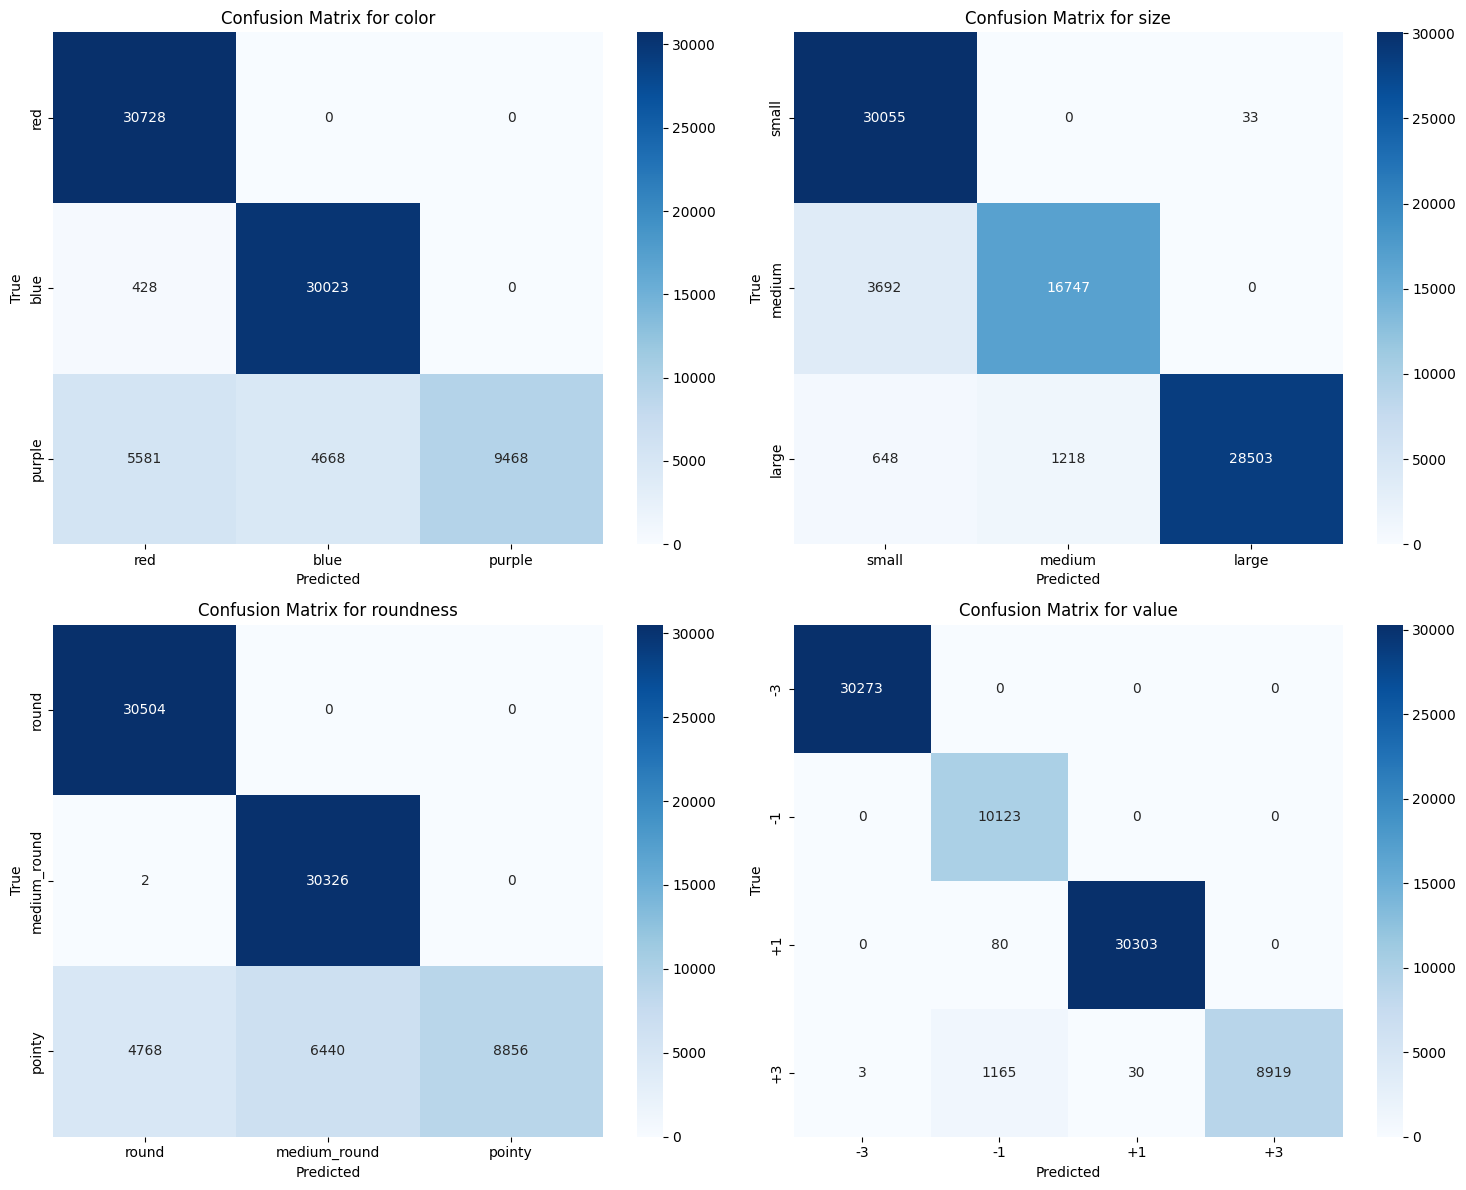

In [ ]:
# Get the last epoch's predictions and targets
last_epoch_predictions = predictions_list[-1]
last_epoch_targets = targets_list[-1]

# Define feature slices and names
feature_slices = {
    'color': slice(0, 3),
    'size': slice(3, 6),
    'roundness': slice(6, 9),
    'value': slice(9, 13)
}

feature_names = {
    'color': ['red', 'blue', 'purple'],
    'size': ['small', 'medium', 'large'],
    'roundness': ['round', 'medium_round', 'pointy'],
    'value': ['-3', '-1', '+1', '+3']
}

# Plot confusion matrix for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (feature, feature_slice) in enumerate(feature_slices.items()):
    pred_feature = last_epoch_predictions[:, feature_slice]
    target_feature = last_epoch_targets[:, feature_slice]

    pred_labels = np.argmax(pred_feature, axis=1)
    target_labels = np.argmax(target_feature, axis=1)

    cm = confusion_matrix(target_labels, pred_labels)
    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Calculate percentage values
    
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=feature_names[feature], 
                yticklabels=feature_names[feature],
                ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {feature}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()
